### Importación de datos



In [51]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [52]:
tiendas = [tienda, tienda2, tienda3, tienda4]

valor_tienda = {}

for nombre_tienda, precio_tienda in enumerate(tiendas):
  suma = 0
  for i in range(len(precio_tienda)):
    precio = float(precio_tienda.loc[i,'Precio'])
    suma += precio
    valor_tienda[f"Tienda {float(nombre_tienda)}"] = suma

In [5]:
print(valor_tienda)

{'Tienda 0.0': 1150880400.0, 'Tienda 1.0': 1116343500.0, 'Tienda 2.0': 1098019600.0, 'Tienda 3.0': 1038375700.0}


# 2. Ventas por categoría

In [53]:
resultados_por_tienda = {}

for idx, df in enumerate(tiendas, start=1):
    contador_categorias = {}

    for i in range(len(df)):
        categoria = df.loc[i, 'Categoría del Producto']

        if categoria in contador_categorias:
            contador_categorias[categoria] += 1
        else:
            contador_categorias[categoria] = 1

    categorias_ordenadas = sorted(
        contador_categorias.items(),
        key=lambda x: x[1],
        reverse=True
    )

    resultados_por_tienda[f'Tienda {idx}'] = categorias_ordenadas



In [54]:
for tienda, datos in resultados_por_tienda.items():
    print(f"\n{tienda}:")
    print("Categorías más vendidas:")
    for categoria, cantidad in datos:
        print(f"- {categoria}: {cantidad} unidades")


Tienda 1:
Categorías más vendidas:
- Muebles: 465 unidades
- Electrónicos: 448 unidades
- Juguetes: 324 unidades
- Electrodomésticos: 312 unidades
- Deportes y diversión: 284 unidades
- Instrumentos musicales: 182 unidades
- Libros: 173 unidades
- Artículos para el hogar: 171 unidades

Tienda 2:
Categorías más vendidas:
- Muebles: 442 unidades
- Electrónicos: 422 unidades
- Juguetes: 313 unidades
- Electrodomésticos: 305 unidades
- Deportes y diversión: 275 unidades
- Instrumentos musicales: 224 unidades
- Libros: 197 unidades
- Artículos para el hogar: 181 unidades

Tienda 3:
Categorías más vendidas:
- Muebles: 499 unidades
- Electrónicos: 451 unidades
- Juguetes: 315 unidades
- Electrodomésticos: 278 unidades
- Deportes y diversión: 277 unidades
- Libros: 185 unidades
- Instrumentos musicales: 177 unidades
- Artículos para el hogar: 177 unidades

Tienda 4:
Categorías más vendidas:
- Muebles: 480 unidades
- Electrónicos: 451 unidades
- Juguetes: 338 unidades
- Deportes y diversión: 2

# 3. Calificación promedio de la tienda


In [55]:
promedios_por_tienda = {}

for idx, df in enumerate(tiendas, start=1):
    suma_calificaciones = 0
    cantidad_calificaciones = 0

    for i in range(len(df)):
        calificacion = df.loc[i, 'Calificación']

        try:
            calificacion = float(calificacion)
            suma_calificaciones += calificacion
            cantidad_calificaciones += 1
        except ValueError:
            print(f"Valor no numérico en la fila {i} de Tienda {idx}: {calificacion}")

    if cantidad_calificaciones > 0:
        promedio = suma_calificaciones / cantidad_calificaciones
    else:
        promedio = 0.0

    promedios_por_tienda[f'Tienda {idx}'] = round(promedio, 2)

print("\nPromedios de calificaciones por tienda:")
for tienda, promedio in promedios_por_tienda.items():
    print(f"{tienda}: {promedio}")


Promedios de calificaciones por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


# 4. Productos más y menos vendidos

In [56]:
resultados_por_tienda = {}

for idx, df in enumerate(tiendas, start=1):
    # Contador de ventas por producto
    contador_productos = {}

    # Recorrer cada fila del DataFrame
    for i in range(len(df)):
        producto = df.loc[i, "Producto"]

        # Actualizar el contador
        if producto in contador_productos:
            contador_productos[producto] += 1
        else:
            contador_productos[producto] = 1

    # Encontrar productos más y menos vendidos
    if contador_productos:
        max_ventas = max(contador_productos.values())
        min_ventas = min(contador_productos.values())

        mas_vendidos = [p for p, v in contador_productos.items() if v == max_ventas]
        menos_vendidos = [p for p, v in contador_productos.items() if v == min_ventas]
    else:
        mas_vendidos = []
        menos_vendidos = []

    # Almacenar resultados
    resultados_por_tienda[f'Tienda {idx}'] = {
        'mas_vendidos': mas_vendidos,
        'menos_vendidos': menos_vendidos
    }

# Mostrar resultados
print("\nResultados:")
for tienda, datos in resultados_por_tienda.items():
    print(f"\n{tienda}:")
    print(f"- Productos más vendidos: {', '.join(datos['mas_vendidos'])}")
    print(f"- Productos menos vendidos: {', '.join(datos['menos_vendidos'])}")


Resultados:

Tienda 1:
- Productos más vendidos: Microondas, TV LED UHD 4K, Armario
- Productos menos vendidos: Auriculares con micrófono, Celular ABXY

Tienda 2:
- Productos más vendidos: Iniciando en programación
- Productos menos vendidos: Juego de mesa

Tienda 3:
- Productos más vendidos: Kit de bancas
- Productos menos vendidos: Bloques de construcción

Tienda 4:
- Productos más vendidos: Cama box
- Productos menos vendidos: Guitarra eléctrica


# 5. Envío promedio por tienda

In [34]:
promedios_por_tienda = {}

for idx, df in enumerate(tiendas, start=1):
    suma_envios = 0.0
    cantidad_envios = 0

    for i in range(len(df)):
        costo_envio = df.loc[i, "Costo de envío"]

        try:
            costo_envio = float(costo_envio)
            suma_envios += costo_envio
            cantidad_envios += 1
        except ValueError:
            print(f"Valor no numérico en la fila {i} de Tienda {idx}: {costo_envio}")

    if cantidad_envios > 0:
        promedio = suma_envios / cantidad_envios
    else:
        promedio = 0.0

    promedios_por_tienda[f'Tienda {idx}'] = round(promedio, 2)

print("\nPromedios de costo de envío por tienda:")
for tienda, promedio in promedios_por_tienda.items():
    print(f"{tienda}: ${promedio}")


Promedios de costo de envío por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# Graficos


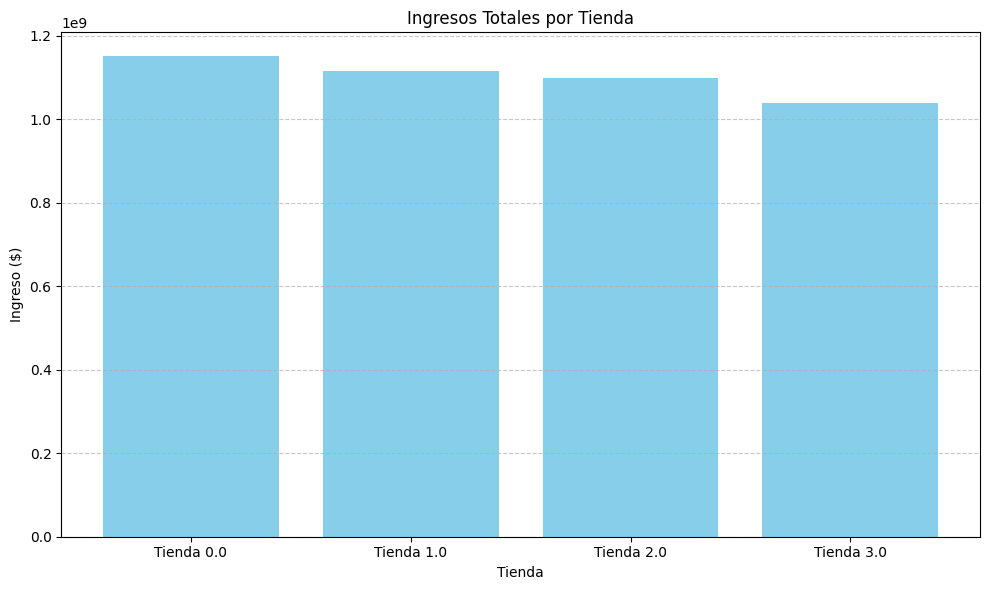

In [36]:
import matplotlib.pyplot as plt

ingresos_por_tienda = valor_tienda

plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_tienda.keys(), ingresos_por_tienda.values(), color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

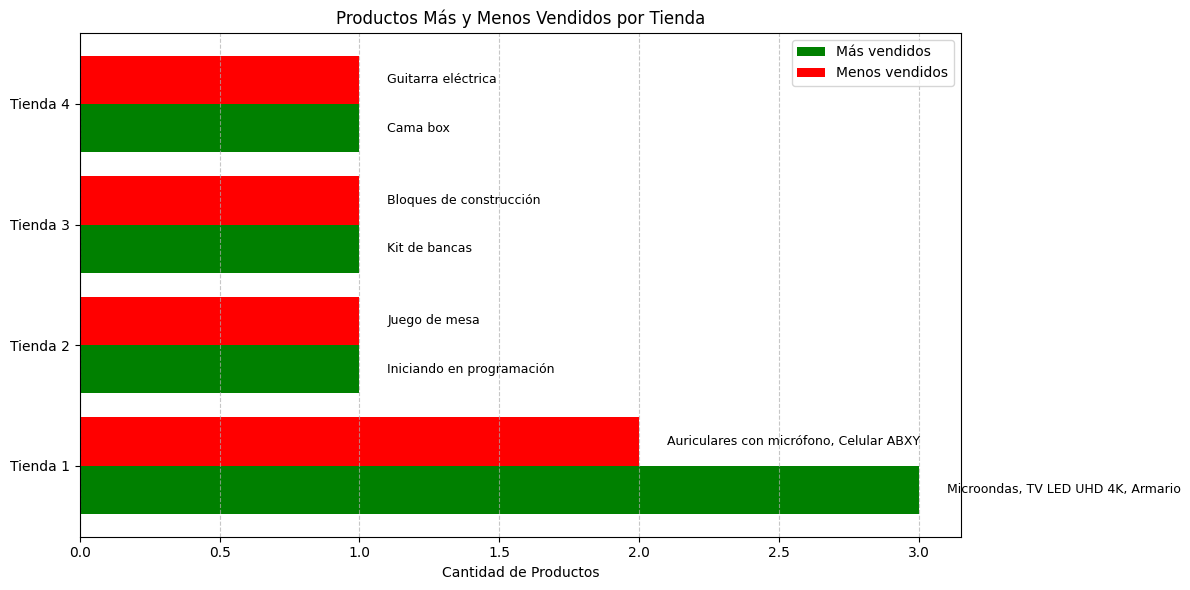

In [62]:
tiendas = list(resultados_por_tienda.keys())
mas_vendidos_count = [len(v['mas_vendidos']) for v in resultados_por_tienda.values()]
menos_vendidos_count = [len(v['menos_vendidos']) for v in resultados_por_tienda.values()]

plt.figure(figsize=(12, 6))
y_indexes = range(len(tiendas))
bar_width = 0.4

bars_mas = plt.barh(y_indexes, mas_vendidos_count, height=bar_width,
                    label='Más vendidos', color='green')

bars_menos = plt.barh([i + bar_width for i in y_indexes],
                      menos_vendidos_count, height=bar_width,
                      label='Menos vendidos', color='red')

for i, tienda in enumerate(tiendas):
    productos_mas = ", ".join(resultados_por_tienda[tienda]['mas_vendidos'])
    plt.text(mas_vendidos_count[i] + 0.1, y_indexes[i], productos_mas,
             va='center', fontsize=9)

    productos_menos = ", ".join(resultados_por_tienda[tienda]['menos_vendidos'])
    plt.text(menos_vendidos_count[i] + 0.1, y_indexes[i] + bar_width,
             productos_menos, va='center', fontsize=9)

plt.yticks([i + bar_width/2 for i in y_indexes], tiendas)
plt.xlabel('Cantidad de Productos')
plt.title('Productos Más y Menos Vendidos por Tienda')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

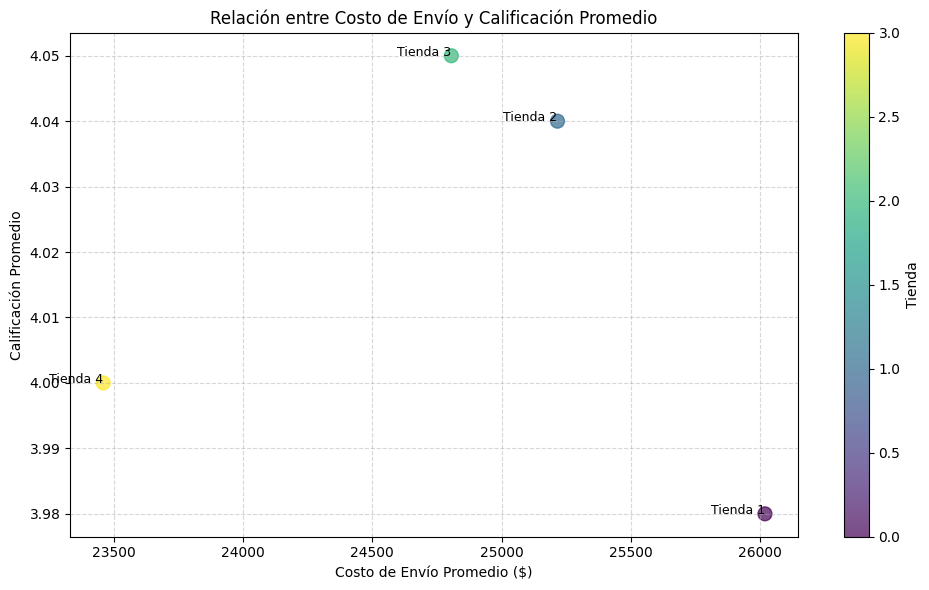

In [58]:
promedios_envio = {}
promedios_calificaciones = {}

for idx, df in enumerate(tiendas, start=1):
    suma_envios = 0.0
    suma_calificaciones = 0.0
    cantidad = 0

    for i in range(len(df)):
        try:
            costo_envio = float(df.loc[i, 'Costo de envío'])
            suma_envios += costo_envio
        except (ValueError, KeyError):
            pass

        try:
            calificacion = float(df.loc[i, 'Calificación'])
            suma_calificaciones += calificacion
        except (ValueError, KeyError):
            pass

        cantidad += 1

    promedio_envio = round(suma_envios / cantidad, 2) if cantidad > 0 else 0.0
    promedio_calificacion = round(suma_calificaciones / cantidad, 2) if cantidad > 0 else 0.0

    promedios_envio[f'Tienda {idx}'] = promedio_envio
    promedios_calificaciones[f'Tienda {idx}'] = promedio_calificacion

tiendas_nombres = list(promedios_envio.keys())
envio = list(promedios_envio.values())
calificaciones = list(promedios_calificaciones.values())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(envio, calificaciones, s=100, alpha=0.7, c=range(len(tiendas_nombres)), cmap='viridis')

for i, tienda in enumerate(tiendas_nombres):
    plt.text(envio[i], calificaciones[i], tienda, fontsize=9, ha='right')

plt.title('Relación entre Costo de Envío y Calificación Promedio')
plt.xlabel('Costo de Envío Promedio ($)')
plt.ylabel('Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label='Tienda')
plt.tight_layout()
plt.show()